In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [2]:
churn_df = pd.read_csv("churn_df.csv")

X = churn_df[['total_day_charge','total_eve_charge']].values
y = churn_df["churn"].values

print(churn_df.head)
print(X.shape, y.shape)

<bound method NDFrame.head of       Unnamed: 0  account_length  total_day_charge  total_eve_charge  \
0              0             101             45.85             17.65   
1              1              73             22.30              9.05   
2              2              86             24.62             17.53   
3              3              59             34.73             21.02   
4              4             129             27.42             18.75   
...          ...             ...               ...               ...   
3328        3328              89             51.66             22.18   
3329        3329             141             43.96             18.87   
3330        3330             111             42.47             20.60   
3331        3331             135             46.48             13.09   
3332        3332              68             27.20             15.68   

      total_night_charge  total_intl_charge  customer_service_calls  churn  
0                   9.64    

In [3]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=15)

In [4]:
X_new = np.array([
    [56.8,17.5],
    [24.4,24.1],
    [50.1,10.9]
])

print(X_new.shape)

(3, 2)


In [5]:
predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))

Predictions: [1 0 0]


In [6]:
X = churn_df[['account_length','customer_service_calls']].values
y = churn_df['churn'].values

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X,y)

X_new = np.array(
    [
        [30.0,17.5],
        [107.0,24.1],
        [213.0,10.9]
    ]
)

y_predict = knn.predict(X_new)
print(y_predict)

[0 1 0]


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=21,stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))

0.854


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
dict_values([0.861551650235748, 0.8731247321045864, 0.8731247321045864, 0.866695242177454, 0.866695242177454, 0.8636948135447922, 0.8645520788684098, 0.8594084869267038, 0.8611230175739392, 0.8572653236176596, 0.8576939562794685, 0.856408058294042, 0.8585512216030862, 0.8555507929704244, 0.8568366909558508, 0.8572653236176596, 0.8576939562794685, 0.8551221603086155, 0.8555507929704244, 0.8551221603086155, 0.8555507929704244, 0.8551221603086155, 0.8551221603086155, 0.8551221603086155, 0.8551221603086155])
dict_values([0.777, 0.847, 0.836, 0.857, 0.854, 0.858, 0.856, 0.851, 0.852, 0.854, 0.854, 0.854, 0.854, 0.854, 0.855, 0.854, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855])


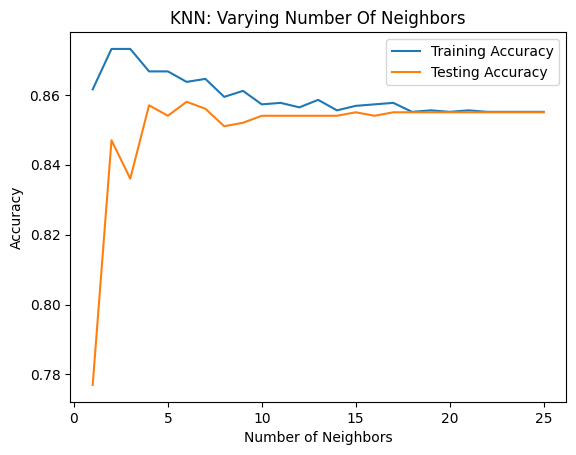

In [8]:
train_accuries = {}
test_accuries = {}
neighbors = np.arange(1,26)
print(neighbors)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    train_accuries[neighbor] = knn.score(X_train,y_train)
    test_accuries[neighbor] = knn.score(X_test,y_test)

print(train_accuries.values())
print(test_accuries.values())


my_train = list(train_accuries.values())
my_test = list(test_accuries.values())

plt.Figure(figsize=(8,6))
plt.title('KNN: Varying Number Of Neighbors')
plt.plot(neighbors,my_train,label = 'Training Accuracy')
plt.plot(neighbors,my_test,label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [24]:
X = churn_df.drop("churn",axis=1).values
y = churn_df["churn"].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))

0.8455772113943029


[ 1  2  3  4  5  6  7  8  9 10 11]
dict_values([1.0, 0.8758439609902475, 0.881470367591898, 0.8649662415603901, 0.8675918979744937, 0.8593398349587397, 0.8612153038259565, 0.8552138034508627, 0.8563390847711928, 0.8552138034508627, 0.8548387096774194])
dict_values([0.7796101949025487, 0.848575712143928, 0.8350824587706147, 0.8470764617691154, 0.8455772113943029, 0.8530734632683659, 0.8530734632683659, 0.8545727136431784, 0.8530734632683659, 0.8545727136431784, 0.8545727136431784])


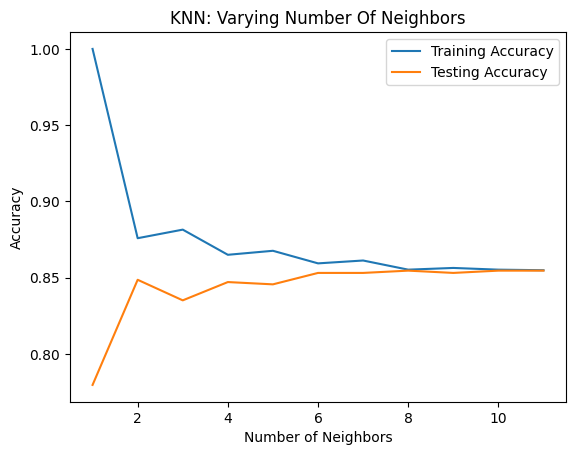

In [23]:
train_accuries = {}
test_accuries = {}
neighbors = np.arange(1,12)
print(neighbors)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    train_accuries[neighbor] = knn.score(X_train,y_train)
    test_accuries[neighbor] = knn.score(X_test,y_test)

print(train_accuries.values())
print(test_accuries.values())


my_train = list(train_accuries.values())
my_test = list(test_accuries.values())

plt.Figure(figsize=(8,6))
plt.title('KNN: Varying Number Of Neighbors')
plt.plot(neighbors,my_train,label = 'Training Accuracy')
plt.plot(neighbors,my_test,label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [25]:
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values
print(X.shape, y.shape)
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

(3333, 7) (3333,)
0.8455772113943029


In [27]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Unnamed: 0,pregnancies,glucose,triceps,insulin,bmi,age,diabetes
0,0,6,148,35,0,33.6,50,1
1,1,1,85,29,0,26.6,31,0
2,2,8,183,0,0,23.3,32,1
3,3,1,89,23,94,28.1,21,0
4,4,0,137,35,168,43.1,33,1


In [36]:
X_diabets = diabetes_df.drop('glucose',axis=1).values
y_diabetes = diabetes_df['glucose'].values

print(type(X),type(y))


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [37]:
diabetes_df = pd.read_csv('diabetes.csv', index_col = 0)
print(diabetes_df.shape)
diabetes_df = diabetes_df[diabetes_df['bmi'] != 0]
print(diabetes_df.shape)
diabetes_df = diabetes_df[diabetes_df['glucose'] != 0]
print(diabetes_df.shape)
diabetes_df.head()

(768, 7)
(757, 7)
(752, 7)


,pregnancies,glucose,triceps,insulin,bmi,age,diabetes
0,6,148,35,0,33.6,50,1
1,1,85,29,0,26.6,31,0
2,8,183,0,0,23.3,32,1
3,1,89,23,94,28.1,21,0
4,0,137,35,168,43.1,33,1


In [38]:
X_bmi = X_diabets[:,3]
print(y.shape, X_bmi.shape)

X_bmi = X_bmi.reshape(-1,1)
print(X_bmi.shape)

(768,) (752,)
(752, 1)


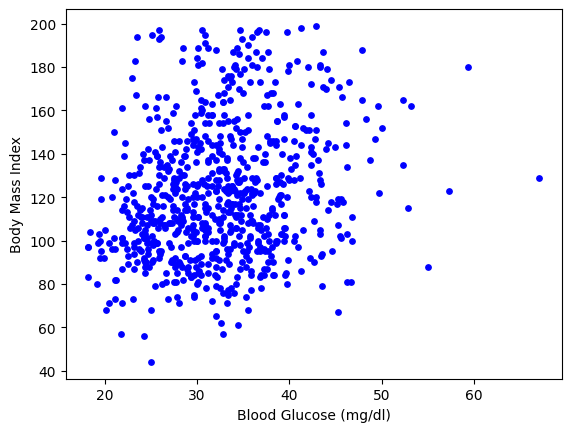

In [39]:
plt.scatter(X_bmi,y_diabetes,s=15,color = 'blue')
plt.xlabel('Blood Glucose (mg/dl)')
plt.ylabel('Body Mass Index')
plt.show()

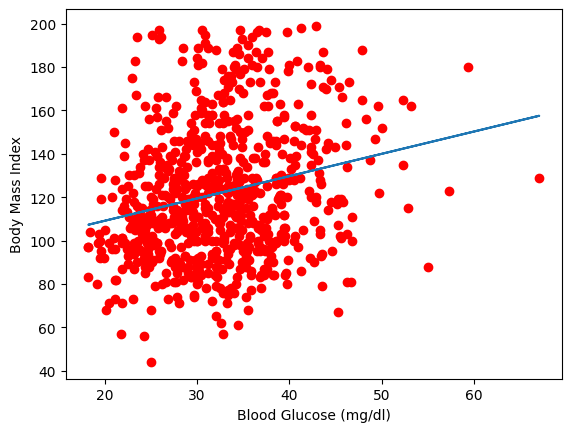

In [41]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_bmi,y_diabetes)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi,y_diabetes,color = 'red')
plt.plot(X_bmi,predictions)
plt.xlabel('Blood Glucose (mg/dl)')
plt.ylabel('Body Mass Index')
plt.show()

In [42]:
sales_df = pd.read_csv('sales_df.csv')
sales_df.head()

,Unnamed: 0,tv,radio,social_media,sales
0,0,16000.0,6566.23,2907.98,54732.76
1,1,13000.0,9237.76,2409.57,46677.90
2,2,41000.0,15886.45,2913.41,150177.83
3,3,83000.0,30020.03,6922.30,298246.34
4,4,15000.0,8437.41,1406.00,56594.18


In [45]:
X_sales = sales_df['radio'].values
y_sales = sales_df['sales'].values
print(X_sales.shape,y_sales.shape)

(4546,) (4546,)


In [49]:
X_sales = X_sales.reshape(-1,1)
print(X_sales.shape)

(4546, 1)


In [54]:
reg = LinearRegression()
reg.fit(X_sales,y_sales)
predictions_sales = reg.predict(X_sales)
print(predictions)



[123.11892469 115.92280307 112.53034574 117.46482913 132.88508973
 114.8947857  120.44607951 124.86655422 119.93207083 127.23099418
 127.64220113 116.43681176 119.52086388 115.10038917 119.41806214
 135.66073664 119.00685519 133.09069321 124.14694206 128.97862372
 124.96935596 129.4926324  118.39004477 126.20297681 120.54888125
 129.08142545 112.427544   111.39952663 123.63293337 125.58616638
 121.06288994 114.0723718  109.03508667 116.95082044 113.2499579
 122.70771774 122.39931252 127.8478046  126.71698549 123.53013164
 129.90383935 111.91353531 135.24952969 116.74521697 131.75427062
 119.10965693 117.36202739 128.77302024 108.52107798 113.45556137
 113.66116485 123.22172642 124.2497438  112.22194053 127.33379592
 136.68875402 130.21224456 131.24026194 122.39931252 114.27797527
 114.68918222 122.29651079 118.39004477 121.98810558 132.47388279
 108.72668146 118.28724303 122.39931252 117.97883782 133.19349495
 124.66095075 121.47409689 122.09090731 127.33379592 132.98789147
 114.277975

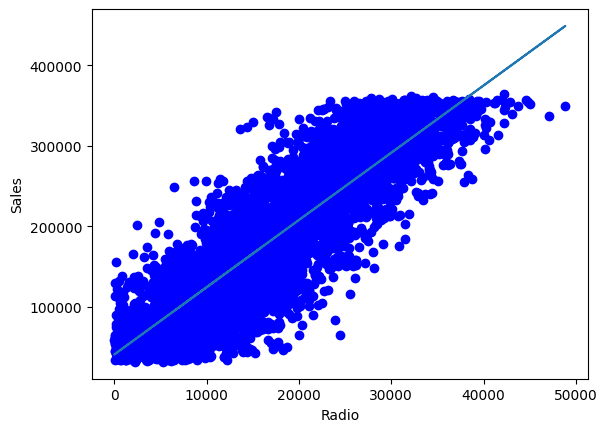

In [55]:
plt.scatter(X_sales,y_sales,color = 'blue')
plt.plot(X_sales,predictions_sales)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split()